In [1]:
%load_ext autoreload
%autoreload 2

# Unconditional quantum teleportation between distant solid-state quantum bits

<center><img src="figure_0.png"/></center>

2021-04-06 18:58:32,981 - qm - INFO - Performing health check
2021-04-06 18:58:33,004 - qm - INFO - Health check passed
2021-04-06 18:58:33,129 - qm - INFO - Performing health check
2021-04-06 18:58:33,133 - qm - INFO - Health check passed
2021-04-06 18:58:33,155 - qm - INFO - to simulate a program, use QuantumMachinesManager.simulate(..)
2021-04-06 18:58:33,171 - qm - INFO - Flags: 
2021-04-06 18:58:33,172 - qm - INFO - Simulating Qua program
2021-04-06 18:58:33,720 - qm - WARNING - pulse 'zeroPulse' used in play is not part of element 'a-reset' operations
2021-04-06 18:58:33,721 - qm - WARNING - pulse 'zeroPulse' used in play is not part of element 'b-reset' operations
2021-04-06 18:58:33,722 - qm - WARNING - pulse 'zeroPulse' used in play is not part of element 'init' operations
2021-04-06 18:58:33,722 - qm - WARNING - pulse 'readoutPulse' used in measure is not part of element 'a-ro' operations
2021-04-06 18:58:33,723 - qm - WARNING - pulse 'readoutPulse' used in measure is not par

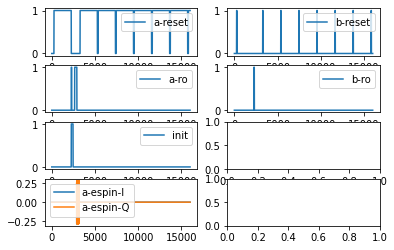

In [2]:
from qm.QuantumMachinesManager import QuantumMachinesManager
from qm.qua import *
from qm import SimulationConfig
from Configuration import config

import matplotlib.pyplot as plt

meas_len=52
short_meas_len=16

th_a=5
th_b=5
N_max=50
M_max=50

Qmm = QuantumMachinesManager()
Qmm.close_all_quantum_machines()
qm = Qmm.open_qm(config)
elements = ['a-reset','b-reset','b-ro','a-ro','init','a-espin','b-espin']

def CRINIT():
    with while_(A_clicks<0 | B_clicks<0):
        
        play("zeroPulse", "a-reset",duration=500)
        play("zeroPulse", "b-reset",duration=10)
        
        
with program() as prog:
    state = declare(int,value=1)
    A_clicks = declare(int,value=-1)
    B_clicks = declare(int,value=-1)
    cr_init = declare(int,value=1)
    N=declare(int,value=0)
    M=declare(int,value=0)
    resultA = declare(int, size=100)
    resultB = declare(int, size=100)
    
    with while_(state<7):
        with if_(state==1):
            play("zeroPulse", "a-reset",duration=500)
            play("zeroPulse", "b-reset",duration=10)
            assign(state,2)
        with if_(state==2):
            align(*elements)
            play('zeroPulse','init',duration=meas_len)
            measure('readoutPulse','a-ro',None,time_tagging.analog(resultA, meas_len,targetLen= A_clicks))
            measure('readoutPulse','b-ro',None,time_tagging.analog(resultB, meas_len,targetLen= B_clicks))

        
    
    
    #C/R init
    CRINIT()
    
    assign(A_clicks,0)
    assign(B_clicks,0)
    
    #MBI
    play('zeroPulse','a-ro',duration=60)
    align('a-ro','a-espin')
    play('CNOT','a-espin',duration=60)
    measure('short_readoutPulse','a-ro',None,time_tagging.analog(resultA, short_meas_len,targetLen= A_clicks))
    with while_()
    with while_(A_clicks<=0 ):    
        with if_(N<N_max & A_clicks<0):
            assign(N,N+1)
            play('zeroPulse','a-ro',duration=60)
            align('a-ro','a-espin')
            play('CNOT','a-espin',duration=60)
            measure('short_readoutPulse','a-ro',None,time_tagging.analog(resultA, short_meas_len,targetLen= A_clicks))
        with else_():
            assign(N,0)
            play("zeroPulse", "a-reset",duration=500)
            play("zeroPulse", "b-reset",duration=10)
    
    #Entangle
    
    
            
            
            

    
    align(*elements)
        
        

    QMm = QuantumMachinesManager()
QMm.close_all_quantum_machines()

QM1 = QMm.open_qm(config)
job = QM1.simulate(prog, SimulationConfig(int(4000)))  # in clock cycles, 4 ns

samples = job.get_simulated_samples()
# samples.con1.plot()
fig, axs = plt.subplots(4, 2)
axs[0,0].plot(samples.con1.digital['1'],label='a-reset')
axs[0,0].legend()
axs[1,0].plot(samples.con1.digital['2'],label='a-ro')
axs[1,0].legend()
axs[2,0].plot(samples.con1.digital['3'],label='init')
axs[2,0].legend()
axs[3,0].plot(samples.con1.analog['2'],label='a-espin-I')
axs[3,0].plot(samples.con1.analog['3'],label='a-espin-Q')
axs[3,0].legend()
axs[0,1].plot(samples.con1.digital['4'],label='b-reset')
axs[0,1].legend()
axs[1,1].plot(samples.con1.digital['5'],label='b-ro')
axs[1,1].legend()